# Lead Scoring Case Study

Team: **Aishwarya Girhare**, **Abhilash Siddaramareddy**, **Harsh Agrawal**

### Problem Statement: 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Our Goals of Case Study:

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads

- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

### Steps: 

1. **Data Loading and Understanding**
2. **Data cleaning**
3. **Data prepartion for Model Building**
4. **Model Building**
5. **Model Evaluation**
6. **Making Predictions on the Test Set**

## Step 1: Data Loading and Understanding

#### Import modules

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore unnecessary warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time, warnings
import datetime as dt

In [3]:
# Set_option to avoid truncation of columns and rows:-
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Load and Understand the data

In [4]:
leads = pd.read_csv('Leads.csv')

# Displaying head of 'lead_df' dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking dimension of dataset
print('Shape: ', leads.shape, '\n')
print('Columns: ')
leads.columns

Shape:  (9240, 37) 

Columns: 


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [6]:
leads.describe() # checking the summary of the dataset

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Observation:**

From the statistical summary above, we can observe that the columns `TotalVisits`, `Total Time Spent on Website`, and `Page Views Per Visit` have outliers. This is evident from the significant difference between their minimum and maximum values. We will verify this further through **Exploratory Data Analysis (EDA)**.

In [7]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [8]:
leads.info()  # Checking column wise info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

**Observation:**
- Total **7 numeric** columns and **30 categorical** columns.
- None of the columns have inconsistent datatype, hence no conversion is required.

## Step 2: Data Cleaning

In [10]:
# Checking and dropping duplicates
print('before -> ',leads.shape)
leads.drop_duplicates(subset=None, inplace=True)
print('after  -> ',leads.shape)

before ->  (9240, 37)
after  ->  (9240, 37)


**Observation** 

The dataset's shape remains unchanged before and after removing duplicates, indicating there are no duplicate values.

In [11]:
# Check the number of missing values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Apart from these there are some values that are marked as `Select`, which states that Student had not selected the option for particular question/column. Hence, these values are missing values only, so it is better toi replace these with `NULL` values. 

In [12]:
# Finding out the list of column which have 'Select' as values

In [13]:
columns = list(leads.columns)
columns_with_select = [x  for x in columns if 'Select' in leads[x].values]
columns_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

The above mentioned columns only contains `Select` values, hence replacing it with NULL

In [14]:
# Replacing 'Select' with NaN  :-
leads = leads.replace('Select', np.nan)

In [15]:
columns_with_select = [x  for x in columns if 'Select' in leads[x].values]
columns_with_select

[]

Now Again checking the Null values:

In [16]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
# Checking in percentage
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [18]:
col_30_pct_null = leads.columns[100*(leads.isnull().sum()/len(leads)) > 30]
col_30_pct_null

Index(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

Columns with more than **70% NULL Values**, so better to drop them:
- **How did you hear about X Education** (78%)
- **Lead Profile** (74%)

Columns with more than **30-60% NULL Values**, so better to drop them:
- **Lead Quality** (51%)
- **Specialization** (37%)
- **Tags** (36%)
- **City** (40%)
- **Asymmetrique Activity Index** (46%)
- **Asymmetrique Profile Index** (46%)
- **Asymmetrique Activity Score** (46%)
- **Asymmetrique Profile Score** (46%)

Out of the above mentioned columns, [`Lead Quality`, `Tags`, `Asymmetrique Activity Index`, `Asymmetrique Activity Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score`] are created by sales team after following up with leads, so we can drop these columns.

Also, for `City`, we cannot replace ~40% of columns cannot be imputed with mode or mean, as this will make the data biased, So dropping this column as well. 

`Specialization` seems to be a very important column, so keeping this. 

In [19]:
miss_col=col_30_pct_null.drop('Specialization')

In [20]:
leads = leads.drop(miss_col, axis=1)
leads.shape

(9240, 28)

Similar to `City`, dropping `Country` as well.

In [21]:
leads.drop(['Country'], axis = 1, inplace = True)

In [22]:
# Checking remaining columns in percentage
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [23]:
# Get the value details(count) of all the columns for df
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('-*'*30)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: co

Also, as noticed above while checking the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. 
These columns are: `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. 

Since practically all of the values for these variables are **`No`**, it's best that we drop these columns as they won't help with our analysis.

In [24]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Checking `What matters most to you in choosing a course` column

In [25]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [26]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [27]:
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [28]:
# Checking Prospect ID and Lead Number
print('Duplicates in Prospect ID: ', leads.duplicated(subset = 'Prospect ID').sum())

print('Duplicates in Lead Number: ', leads.duplicated(subset = 'Lead Number').sum())

Duplicates in Prospect ID:  0
Duplicates in Lead Number:  0


**Observation:**
`Prospect ID` and `Lead Number` both do not have duplicate values means these columns identify each data uniquely so working as unique Id and will not make any significant impact on our model. So we can drop it.

In [29]:
# Dropping Prospect ID and Lead Number
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [30]:
leads.drop(['Last Notable Activity'], axis=1, inplace = True)

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [32]:
leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
dtype: int64

Looking into `Specialization` Column

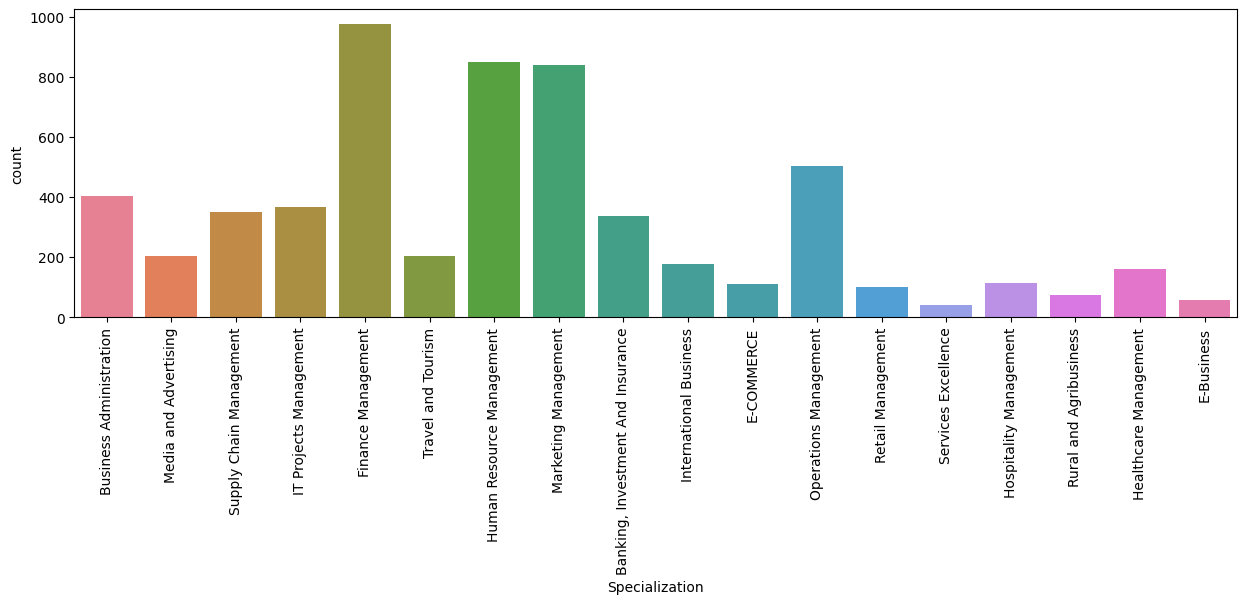

In [33]:
plt.figure(figsize=(15,4))
sns.countplot(x=leads['Specialization'], palette='husl')
plt.xticks(rotation=90)
plt.show()

In [34]:
leads['Specialization'].fillna('Other', inplace=True)

Looking into `What is your current occupation` Column

In [35]:
# Checking value counts of 'What is your current occupation' variable:-
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

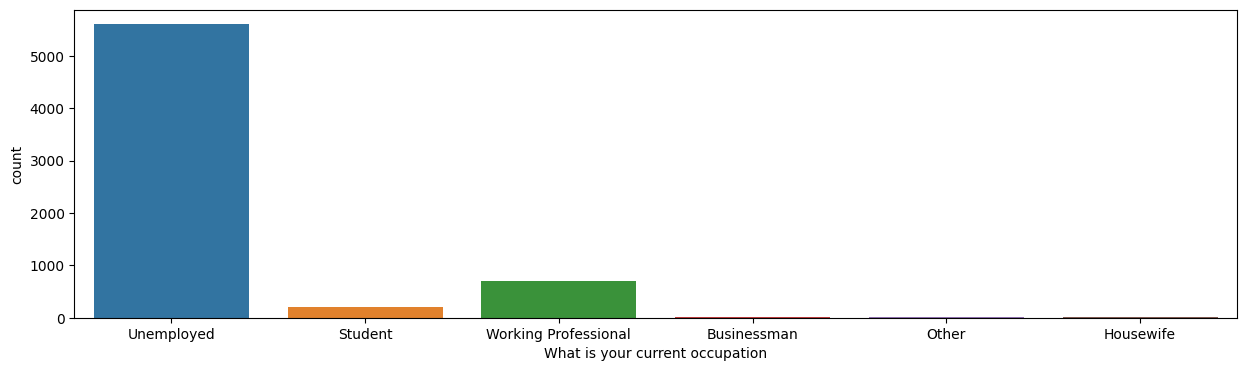

In [36]:
# Plotting count plot to check data counts in column 'What is your current occupation':-
plt.figure(figsize=(15,4))
sns.countplot(x=leads['What is your current occupation'], palette='tab10')
plt.show()

**Observation**

We see that `Unemployed` count is highest but we will impute missing values with `Other` considering we do not know current occupation of lead. So we will create a separate category called `Other`.

In [37]:
leads['What is your current occupation'].fillna('Other',inplace=True)

Looking into `Lead Source` Column

In [38]:
leads['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

**Observation**

- We can see from above that there are same values with different names, i.e. `Google` and `google`, so it's better to merge both under same word `Google`.
- Since, `Google` is having the highest occurance, so we can replace/impute missing values with `Google`.

In [39]:
leads['Lead Source']=leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'].fillna('Google', inplace=True)
leads['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Looking into `TotalVisits`, `Page Views Per Visit`, `Last Activity` Column

In [40]:
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

**Observations**

As we don't know that the last activity of leads for the missing values. Most frequent value is `Email Opened`, and the missing percentage is close to 1%, Hence, we can impute the missing values with this frequent value. 

In [41]:
leads['Last Activity'].fillna('Email Opened', inplace=True)

In [42]:
# Imputing missing value with median value for both 'TotalVisits' and 'Page Views Per Visit' columns

leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

In [43]:
leads.shape

(9240, 11)

In [44]:
100*leads.isnull().sum()/len(leads)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

## Exploratory Data Analysis (EDA)

### Univariate Analysis

As per the problem statement `Converted` is our target variable. 

The target variable indicates whether a lead has been successfully converted or not. 
- 0: Not converted
- 1: Successfully converted

#### Calculating Conversion rate

In [45]:
conversion_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion_rate

38.53896103896104

**Checking Distribution**

In [46]:
leads.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [47]:
leads.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

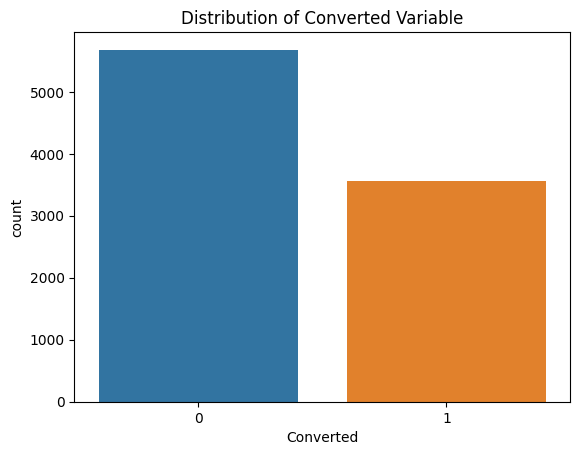

In [48]:
sns.countplot(data=leads, x='Converted', palette='tab10')
plt.title("Distribution of Converted Variable")
plt.show()

#### Imbalance 

In [49]:
(leads.Converted==1).sum()/(leads.Converted==0).sum()

0.6270470153195985

In [50]:
# Again checking data types of remaining columns
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

Analyzing Categorical Variables

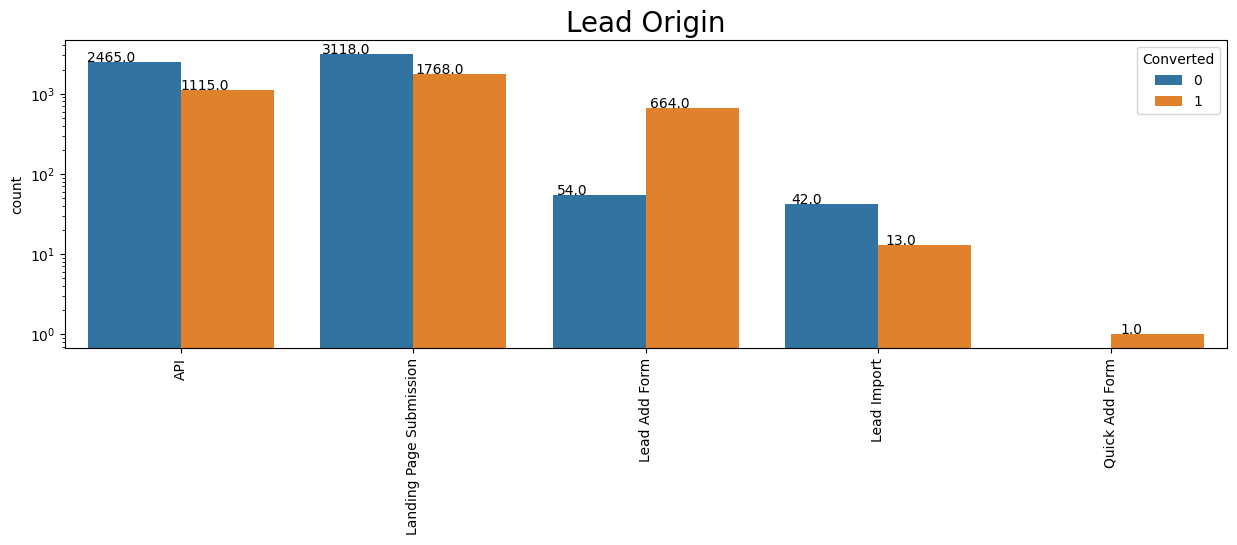

In [51]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1

plt.figure(figsize = (15,4))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

**Observation**

From above plot we can observe and calculate that :

- Conversion rate for `API` is ~ 31% and for `Landing Page Submission` is ~36%.
- For `Lead Add Form` number of conversion is more than unsuccessful conversion.
- Count of `Lead Import` is lesser.

**Recommendation**

To improve overall lead conversion rate, we need to focus more on improving lead conversion of `API` and `Landing Page Submission` origin and generate more leads from `Lead Add Form`.

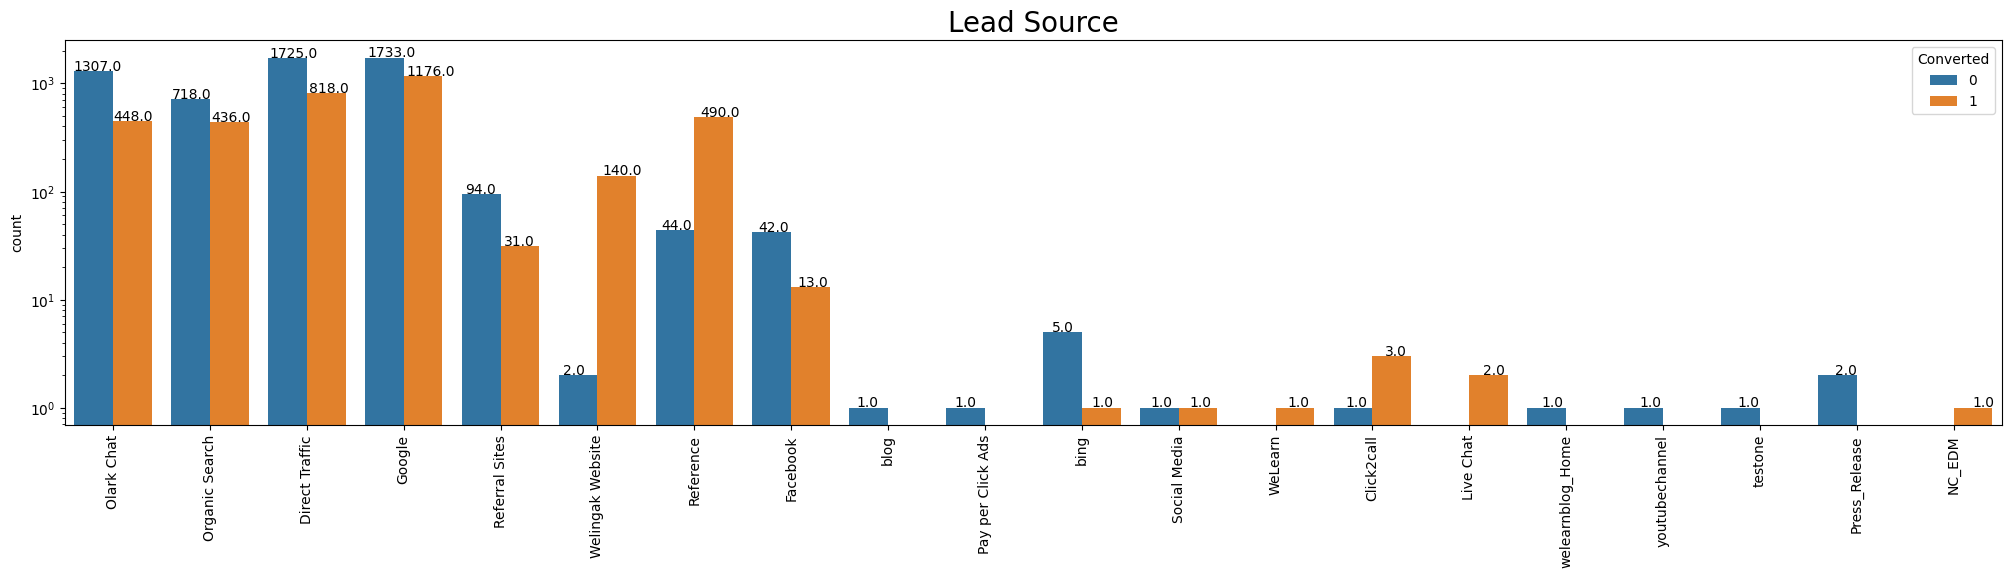

In [52]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log') # Setting up logrithmic scale

plt.show()

The data is very distributed among lower values. Hence, clubbing lower frequency values together under a common label `Others`.


In [53]:
leads['Lead Source'] = leads['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                     'Press_Release','NC_EDM'], 'Others')

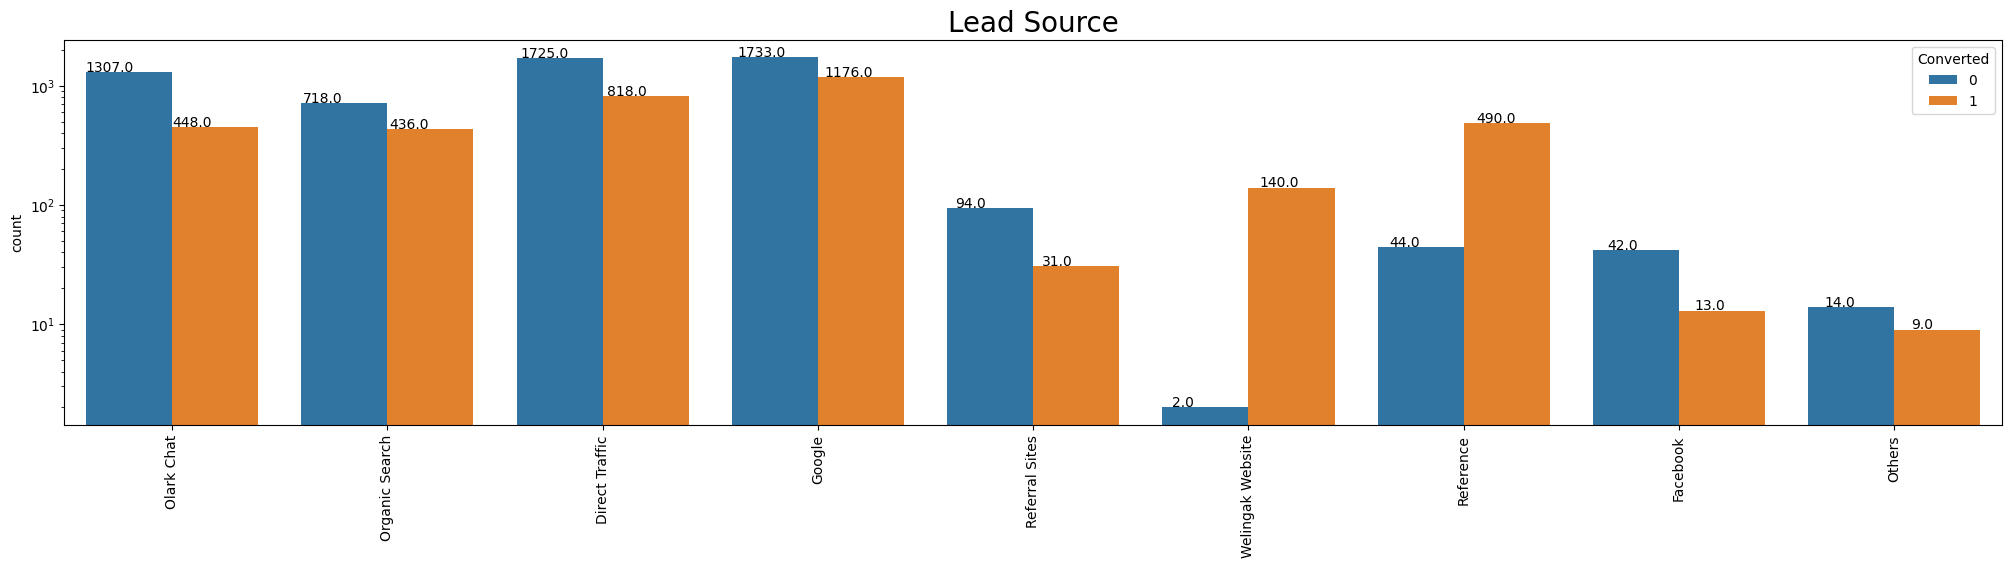

In [54]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log') # Setting up logrithmic scale

plt.show()

**Observation**

From above plot we can observe:
- `Google` and `Direct traffic` generates maximum number of leads.
- Conversion rate of `Reference` and `Welingak Website` leads is high.

**Recommendation**
To improve overall lead conversion rate, focus should be on improving lead converion of `Olark chat`, `organic search`, `direct traffic`, and `google` leads and generate more leads from `reference` and `welingak website`.

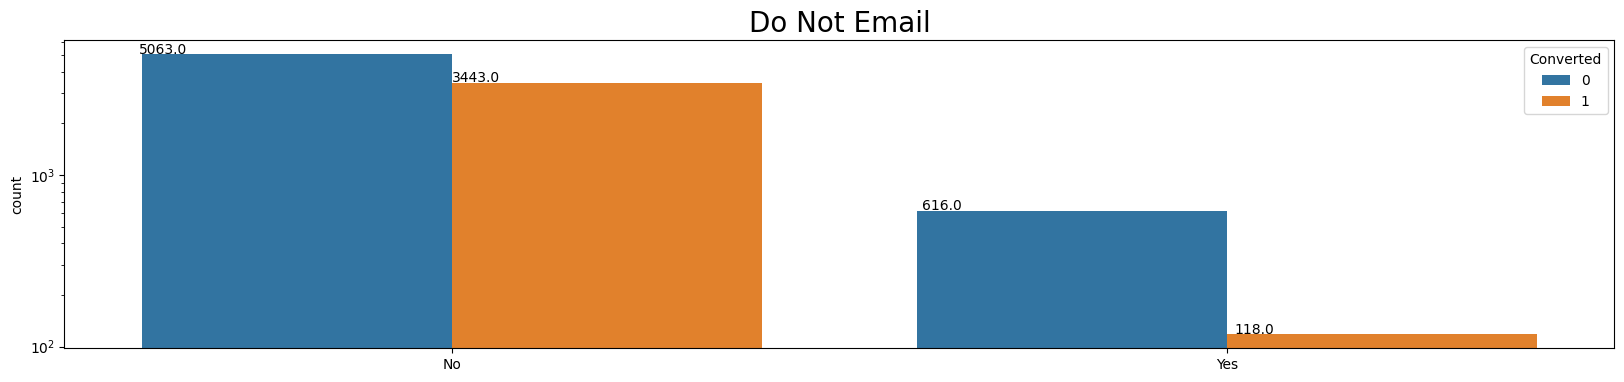

In [55]:
# Plotting count plot of 'Do Not Email' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,4))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks()
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

**Observation**

People who opted for mail option are becoming more leads.

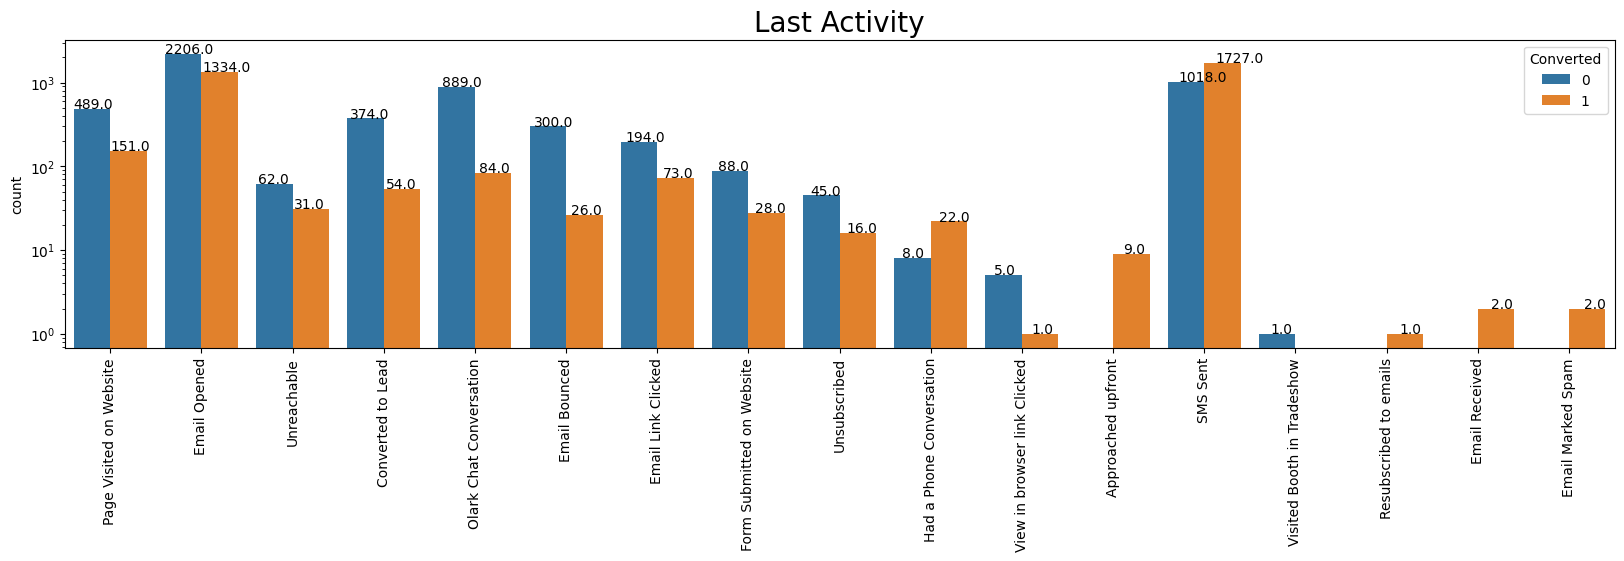

In [56]:
# Plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,4))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log') # Setting logrithmic scale

plt.show()

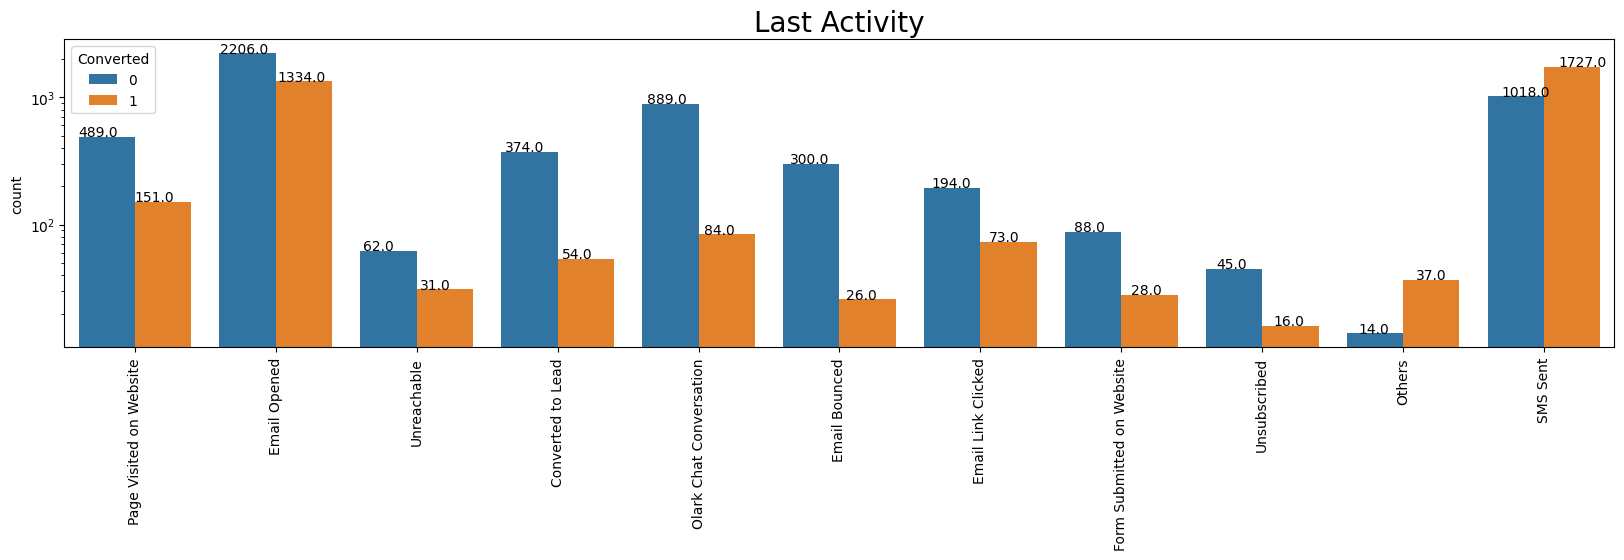

In [57]:
# Combining all low frequency values together under label 'Others':-

leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')


plt.figure(figsize = (20,4))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log') # Setting logrithmic scale

plt.show()

**Observation**
- Conversion rate for last activity of `SMS Sent` is **~63%**.
- Highest last activity of leads is `Email Opened`.

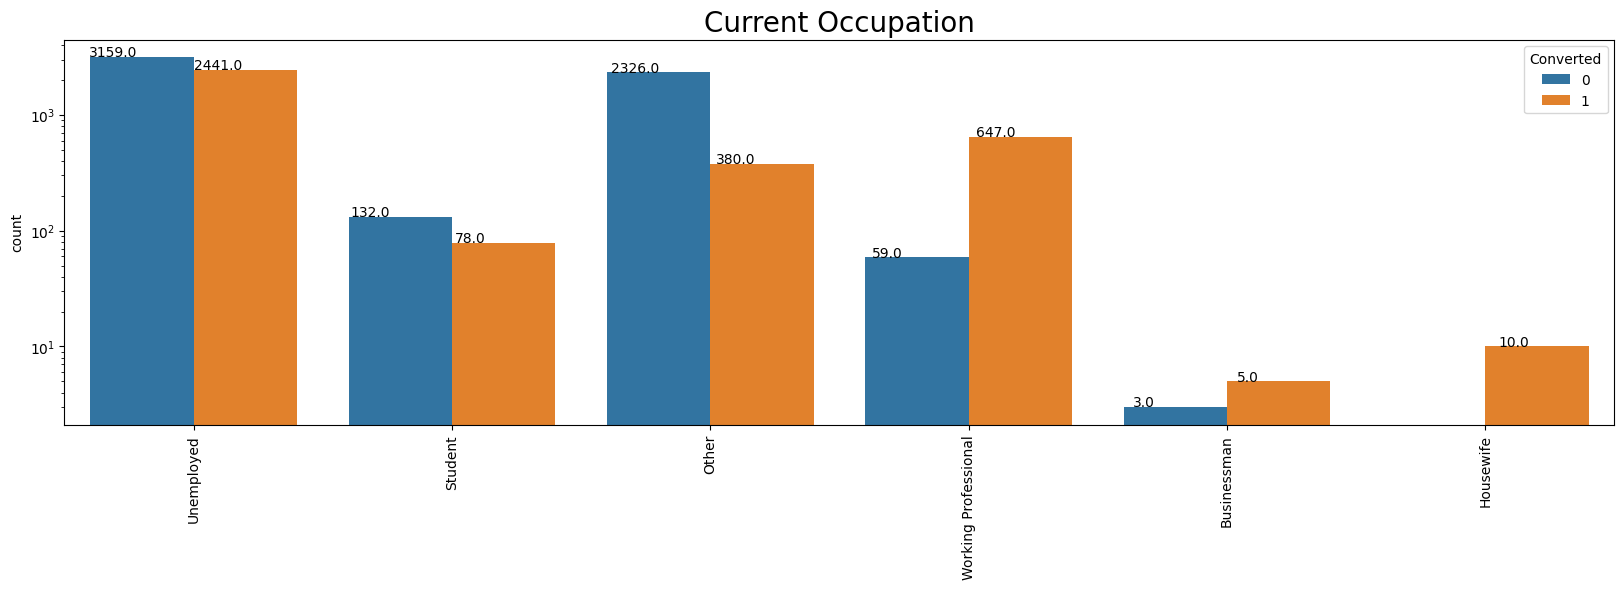

In [58]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

**Observation**
- `Unemployed` leads are generationg more number of leads and having **~45%** conversion rate.
- Conversion rate is higher for `Working Professionals`.

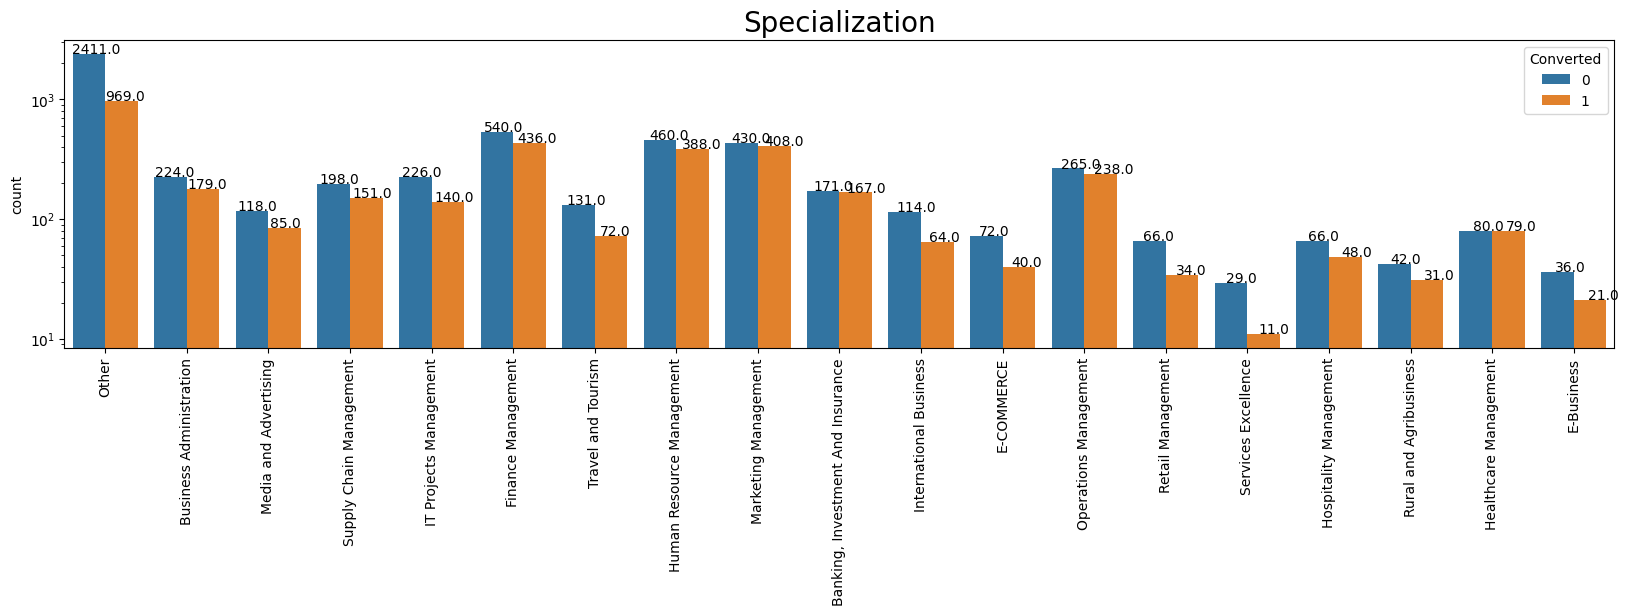

In [59]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,4))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log') # Setting logrithmic scale

plt.show()

**Observation** 

We can observe from above count plot of `Specialization` that `Management` specialization altogether having more number of leads generating.And Other category is also generating more number of leads.

**Outlier Analysis and treatment**

Analysing `TotalVisits`

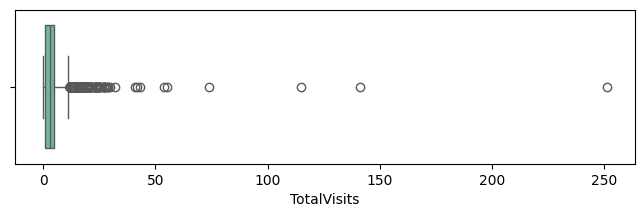

In [60]:
# Plotting box plots to visualize data distribution of 'TotalVisits'

plt.figure(figsize = (8,2))
sns.boxplot(leads['TotalVisits'],orient='h',palette='Set2')

plt.show()

**Observation**
We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [61]:
# Treating outliers by capping upper range to 0.99:-

Q3 = leads.TotalVisits.quantile(0.99)

leads = leads[(leads.TotalVisits <= Q3)]

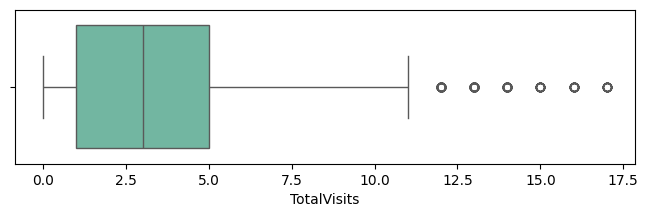

In [62]:
plt.figure(figsize = (8,2))
sns.boxplot(leads['TotalVisits'],orient='h',palette='Set2')

plt.show()

Analysing `Total Time Spent on Website`

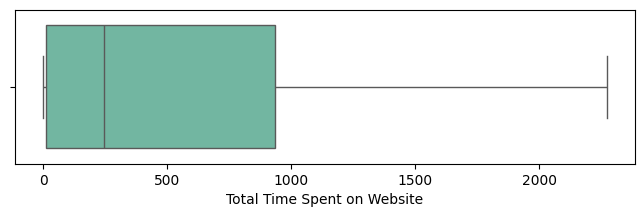

In [63]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-

plt.figure(figsize=(8,2))
sns.boxplot(leads['Total Time Spent on Website'],orient='h',palette='Set2')
plt.show()

**Observation**

From above box plot we can see that there is no outlier in data, so no trreatment required.

Analysing `Page Views Per Visit`

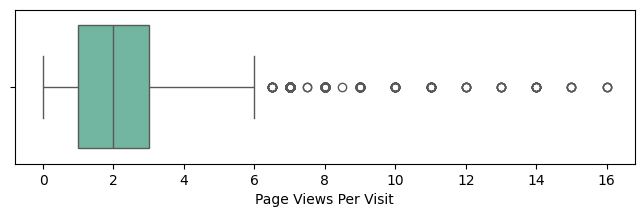

In [64]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit':-
plt.figure(figsize=(8,2))
sns.boxplot(leads['Page Views Per Visit'], orient='h', palette='Set2')
plt.show()

**Observation**

We can see from above box plot that only upper range outliers are present in data, so need to lower range treat outliers.

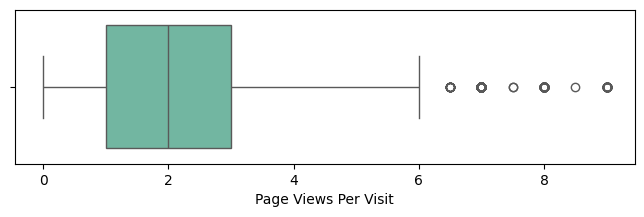

In [65]:
# Treating upper range outliers by capping upper range to 0.99:-

Q3 = leads['Page Views Per Visit'].quantile(0.99)

leads = leads[(leads['Page Views Per Visit'] <= Q3)]

plt.figure(figsize=(8,2))
sns.boxplot(leads['Page Views Per Visit'], orient='h', palette='Set2')
plt.show()

### Bivariate Analysis


In [66]:
leads[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.043354,0.360298,-0.007582
TotalVisits,0.043354,1.000000,0.346250,0.721109
Total Time Spent on Website,0.360298,0.346250,1.000000,0.344210
Page Views Per Visit,-0.007582,0.721109,0.344210,1.000000


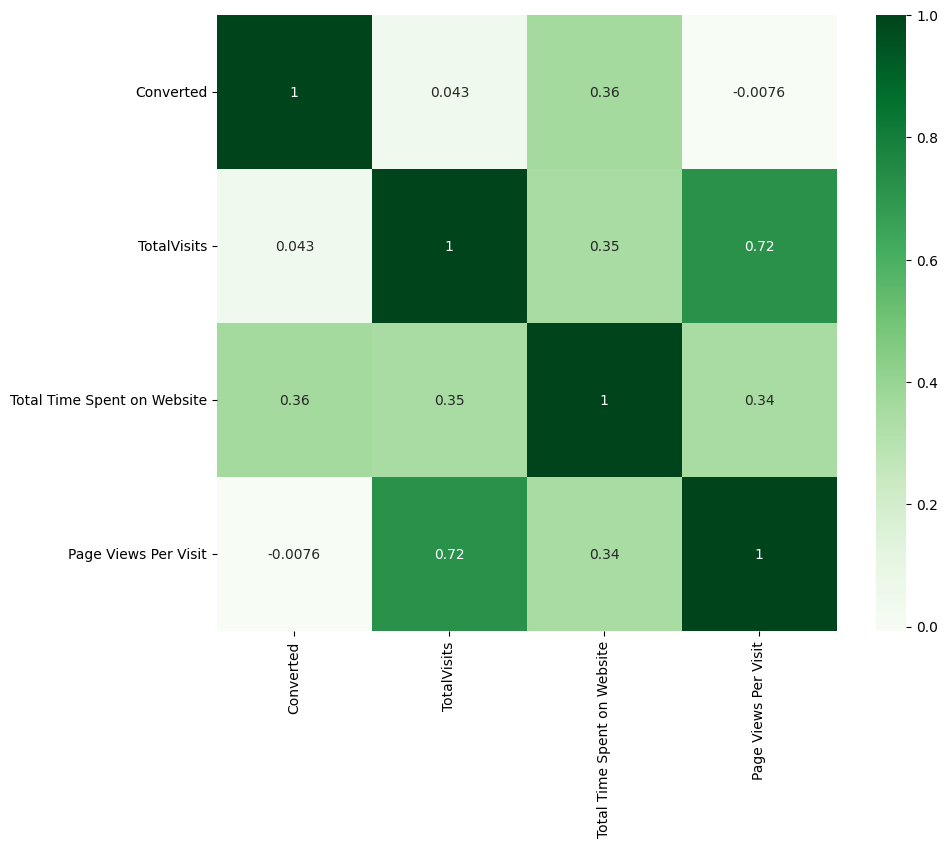

In [67]:
# Heatmap to understand the attributes correlation:-

plt.figure(figsize = (10,8))        
ax = sns.heatmap(leads[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot = True, cmap='Greens')

**Observation**
- `TotalVisits` and `Page Views Per Visit` are highly correlated with correlation of **.72**.
- `Total Time Spent on Website` has correlation of 0.36 with target variable `Converted`.

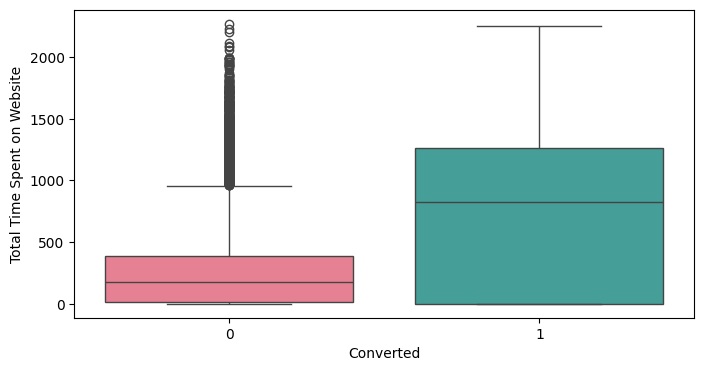

In [68]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(8,4))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads, palette='husl')
plt.show()

**Observation**

Leads spending more time on website are more likely to opt for curses or converted.

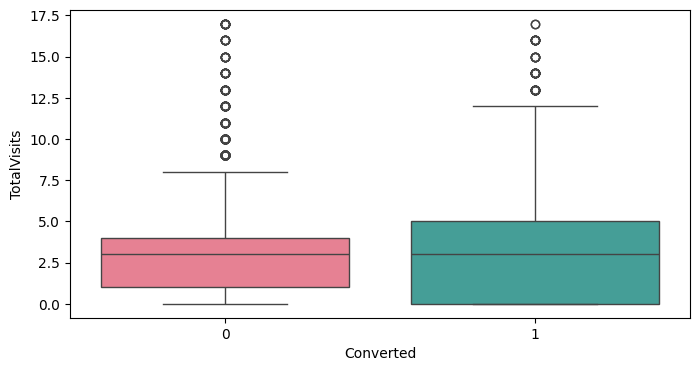

In [69]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:-

plt.figure(figsize=(8,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads, palette='husl')
plt.show()

**Observation**

From above plot we can see that median for converted and non-converted is approx same.

## Step 3: Data Prepartion

#### Converting some binary variables (Yes/No) to 0/1

In [70]:
cols = ['Do Not Email', 'A free copy of Mastering The Interview'] # columns to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:-

leads[cols] = leads[cols].apply(binary_map)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0


### Creating Dummy Variable

For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [71]:
cat_col= leads.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], dtype='object')

In [72]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True'
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True, dtype=int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [73]:
leads = pd.concat([dummy,leads],axis = 1)
leads.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0


In [74]:
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'], axis=1, inplace = True)
leads.shape

(9090, 51)

In [75]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   int64  
 1   Lead Origin_Lead Add Form                             9090 non-null   int64  
 2   Lead Origin_Lead Import                               9090 non-null   int64  
 3   Lead Origin_Quick Add Form                            9090 non-null   int64  
 4   Lead Source_Facebook                                  9090 non-null   int64  
 5   Lead Source_Google                                    9090 non-null   int64  
 6   Lead Source_Olark Chat                                9090 non-null   int64  
 7   Lead Source_Organic Search                            9090 non-null   int64  
 8   Lead Source_Others                                    9090 non-

**Note:** Now, we can see that we have all variables as numeric.

### Test Train Split

In [76]:
# Importing required library to split data
from sklearn.model_selection import train_test_split

In [77]:
X = leads.drop(['Converted'], axis=1) # Putting feature variable to X

X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1428,1.0,0


In [78]:
y = leads['Converted'] # Putting response variable to y

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Splitting the data into train and test of 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

X_train:  (6363, 50)
X_test:  (2727, 50)


In [80]:
leads.info() # Verifying info of data set after splitting

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   int64  
 1   Lead Origin_Lead Add Form                             9090 non-null   int64  
 2   Lead Origin_Lead Import                               9090 non-null   int64  
 3   Lead Origin_Quick Add Form                            9090 non-null   int64  
 4   Lead Source_Facebook                                  9090 non-null   int64  
 5   Lead Source_Google                                    9090 non-null   int64  
 6   Lead Source_Olark Chat                                9090 non-null   int64  
 7   Lead Source_Organic Search                            9090 non-null   int64  
 8   Lead Source_Others                                    9090 non-

### Feature Scaling

We are using 'StandardScaler' here for scaling.



In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()  # Initiating scaler object for 'StandardScaler'

# Applying 'fit_transform' to scale the 'train' data set
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.336782,-0.428736,0.044021,0
6087,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.094877,-0.887355,-1.206716,0
1033,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.642022,-0.025151,1.477269,0
7656,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.989402,-0.241619,2.014065,1
3241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294642,0.897591,-0.492776,1


#### Checking the Correlation Matrix

In [83]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

**Observation:**

The heatmap clearly indicates which variables are multicollinear and which have high collinearity with the target variable. We will use this map to build the logistic model, validating different correlated values along with VIF and p-value to identify which variables to select or eliminate.

From the heatmap, we observe:

- `Lead Source_Facebook` and `Lead Origin_Lead Import` have a high correlation of **0.98**.
- `Do Not Email` and `Last Activity_Email Bounced` are highly correlated.
- `Lead Origin_Lead Add Form` and `Lead Source_Reference` have a correlation of **0.85**.
- `TotalVisits` and `Page Views Per Visit` have a correlation of **0.72**.
- `Lead Origin_Lead Add Form`, `Lead Source_Welingak Website`, `Last Activity_SMS Sent`, and `What is your current Occupation_Working Professionals` show a positive correlation with the target variable `Converted`.

## Step 4: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

Model Building using Stats Model & RFE

In [84]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression() # Creating LogisticRegression Object called regressor

In [85]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor, n_features_to_select=15) # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)

In [86]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last Activity_Unsubscribed', True, 1),
 ('What is your current occupation_Housewife',

In [87]:
col_list = X_train.columns[rfe.support_] # Storing columns selected by RFE into a variable col_list
col_list

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Working Professional', 'Specialization_Hospitality Management', 'Specialization_Other', 'Do Not Email', 'Total Time Spent on Website'], dtype='object')

In [95]:
X_train.columns[~rfe.support_] # Displaying columns which are not selected by RFE

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Rur

In [89]:
X_train.dtypes

Lead Origin_Landing Page Submission                       int64
Lead Origin_Lead Add Form                                 int64
Lead Origin_Lead Import                                   int64
Lead Origin_Quick Add Form                                int64
Lead Source_Facebook                                      int64
Lead Source_Google                                        int64
Lead Source_Olark Chat                                    int64
Lead Source_Organic Search                                int64
Lead Source_Others                                        int64
Lead Source_Reference                                     int64
Lead Source_Referral Sites                                int64
Lead Source_Welingak Website                              int64
Last Activity_Email Bounced                               int64
Last Activity_Email Link Clicked                          int64
Last Activity_Email Opened                                int64
Last Activity_Form Submitted on Website 

In [97]:
X_train_rfe = X_train[col_list] # Creating X_test dataframe with RFE selected variables

#### Using manual feature elimination

**Running First Training Model**

### Model 1

Let's start with the columns selected by `RFE`.

In [98]:
import statsmodels.api as sm

In [102]:
X_train_sm = sm.add_constant(X_train_rfe) # Adding a constant

# Building first fitted model
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

# Print a summary of the logistic regression model obtained
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.5
Date:                Sat, 15 Jun 2024   Deviance:                       5134.9
Time:                        12:42:46   Pearson chi2:                 6.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3761      0.126     -2.988      0.003      -0.623      -0.129
Lead Origin_Landing Page Submission                     -0.8685      0.129     -6.721      0.000      -1.122      -0.615
Lead Origin_Lead Add Form                                2.9597      0.211     14.012      0.000       2.546       3.374
Lead Source_Olark Chat                                   1.1756      0.124      9.449      0.000       0.932       1.420
Lead Source_Welingak Website                             3.1841      1.029      3.094      0.002       1.167       5.201
Last Activity_Olark Chat Conversation                   -1.2072      0.167     -7.233      0.000      -1.534      -0.880
Last Activity_Others                                     1.2625      0.482      2.619      0.009       0.318       2.207
Last Activity_SMS Sent                                   1.4021      0.076     18.549      0.000       1.254       1.550
Last Activity_Unsubscribed                               1.4655      0.449      3.263      0.001       0.585       2.346
What is your current occupation_Housewife               22.8356   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Other                   -1.1796      0.089    -13.276      0.000      -1.354      -1.005
What is your current occupation_Working Professional     2.3887      0.189     12.645      0.000       2.018       2.759
Specialization_Hospitality Management                   -0.9458      0.336     -2.813      0.005      -1.605      -0.287
Specialization_Other                                    -0.8659      0.124     -6.987      0.000      -1.109      -0.623
Do Not Email                                            -1.5714      0.181     -8.706      0.000      -1.925      -1.218
Total Time Spent on Website                              1.0715      0.040     26.577      0.000       0.992       1.151
========================================================================================================================
"""

#### VIF Check for multicollinearity : variance_inflation_factor


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Specialization_Other,2.19
2,Lead Source_Olark Chat,2.04
0,Lead Origin_Landing Page Submission,1.67
9,What is your current occupation_Other,1.63
1,Lead Origin_Lead Add Form,1.53
6,Last Activity_SMS Sent,1.52
4,Last Activity_Olark Chat Conversation,1.48
3,Lead Source_Welingak Website,1.32
14,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.20


**Dropping insignificant columns and updating the model**

Since the p-value for column `What is your current occupation_Housewife` is **0.999 (p>0.05)**, we can drop this columns


In [105]:
X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [106]:
X_train_sm2 = sm.add_constant(X_train_new) # Adding a constant

# Building first fitted model
log_model2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()).fit()

# Print a summary of the logistic regression model obtained
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.0
Date:                Sat, 15 Jun 2024   Deviance:                       5148.0
Time:                        12:51:11   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3662      0.126     -2.915      0.004      -0.613      -0.120
Lead Origin_Landing Page Submission                     -0.8666      0.129     -6.716      0.000      -1.120      -0.614
Lead Origin_Lead Add Form                                2.9724      0.211     14.089      0.000       2.559       3.386
Lead Source_Olark Chat                                   1.1745      0.124      9.443      0.000       0.931       1.418
Lead Source_Welingak Website                             3.1699      1.029      3.081      0.002       1.153       5.187
Last Activity_Olark Chat Conversation                   -1.2112      0.167     -7.256      0.000      -1.538      -0.884
Last Activity_Others                                     1.2546      0.482      2.601      0.009       0.309       2.200
Last Activity_SMS Sent                                   1.3941      0.076     18.462      0.000       1.246       1.542
Last Activity_Unsubscribed                               1.4606      0.449      3.252      0.001       0.580       2.341
What is your current occupation_Other                   -1.1839      0.089    -13.332      0.000      -1.358      -1.010
What is your current occupation_Working Professional     2.3804      0.189     12.603      0.000       2.010       2.751
Specialization_Hospitality Management                   -0.9525      0.336     -2.834      0.005      -1.611      -0.294
Specialization_Other                                    -0.8715      0.124     -7.040      0.000      -1.114      -0.629
Do Not Email                                            -1.5757      0.180     -8.731      0.000      -1.929      -1.222
Total Time Spent on Website                              1.0708      0.040     26.590      0.000       0.992       1.150
========================================================================================================================
"""

In [107]:
# Calculating VIF for new model after dropping insignificant columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Other,2.19
2,Lead Source_Olark Chat,2.04
0,Lead Origin_Landing Page Submission,1.66
8,What is your current occupation_Other,1.63
1,Lead Origin_Lead Add Form,1.53
6,Last Activity_SMS Sent,1.52
4,Last Activity_Olark Chat Conversation,1.48
3,Lead Source_Welingak Website,1.32
13,Total Time Spent on Website,1.25
9,What is your current occupation_Working Profes...,1.20


**Dropping insignificant column and updating the model**

Dropping `Last Activity_Others` because of  **p-value=0.01**

In [108]:
X_train_new = X_train_new.drop(["Last Activity_Others"], axis = 1)

### Model 3

In [109]:
X_train_sm3 = sm.add_constant(X_train_new) # Adding a constant

# Building first fitted model
log_model3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()).fit()

# Print a summary of the logistic regression model obtained
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Sat, 15 Jun 2024   Deviance:                       5155.3
Time:                        12:55:10   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3519      0.126     -2.803      0.005      -0.598      -0.106
Lead Origin_Landing Page Submission                     -0.8696      0.129     -6.739      0.000      -1.123      -0.617
Lead Origin_Lead Add Form                                2.9788      0.211     14.145      0.000       2.566       3.392
Lead Source_Olark Chat                                   1.1708      0.124      9.422      0.000       0.927       1.414
Lead Source_Welingak Website                             3.1537      1.029      3.065      0.002       1.137       5.170
Last Activity_Olark Chat Conversation                   -1.2222      0.167     -7.323      0.000      -1.549      -0.895
Last Activity_SMS Sent                                   1.3824      0.075     18.345      0.000       1.235       1.530
Last Activity_Unsubscribed                               1.4457      0.449      3.219      0.001       0.565       2.326
What is your current occupation_Other                   -1.1883      0.089    -13.389      0.000      -1.362      -1.014
What is your current occupation_Working Professional     2.3930      0.189     12.657      0.000       2.022       2.764
Specialization_Hospitality Management                   -0.9632      0.336     -2.864      0.004      -1.622      -0.304
Specialization_Other                                    -0.8710      0.124     -7.038      0.000      -1.114      -0.628
Do Not Email                                            -1.5728      0.180     -8.738      0.000      -1.926      -1.220
Total Time Spent on Website                              1.0724      0.040     26.650      0.000       0.993       1.151
========================================================================================================================
"""

In [110]:
# Calculating VIF for new model after dropping insignificant columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Other,2.18
2,Lead Source_Olark Chat,2.04
0,Lead Origin_Landing Page Submission,1.66
7,What is your current occupation_Other,1.62
1,Lead Origin_Lead Add Form,1.52
5,Last Activity_SMS Sent,1.51
4,Last Activity_Olark Chat Conversation,1.48
3,Lead Source_Welingak Website,1.31
12,Total Time Spent on Website,1.25
8,What is your current occupation_Working Profes...,1.20


**Observation:**

From the `log_model3` model, we observe that the P-values of the variables are significant and the VIF values are below 3. Therefore, no additional variables need to be dropped, and we can proceed with making predictions using this model, considering `log_model3` as the final model.


### Making prediction on `train` dataset based on final model


In [111]:
# Calculating predicted values of `y_train`

y_train_pred = log_model3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

302     0.053608
6087    0.022650
1033    0.222715
7656    0.158289
3241    0.754615
5738    0.035694
7366    0.097448
3680    0.043363
4170    0.738237
43      0.050949
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1) # Reshaping
y_train_pred[:10]

array([0.05360835, 0.02265028, 0.22271548, 0.15828858, 0.75461523,
       0.03569367, 0.09744843, 0.04336321, 0.73823654, 0.05094927])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities which we just created


In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index # Adding column 'Prospect ID' for indexing

y_train_pred_final.head()  # Looing into the top of the created DF

,Converted,Converted_Prob,Prospect ID
0,0,0.053608,302
1,0,0.022650,6087
2,0,0.222715,1033
3,0,0.158289,7656
4,1,0.754615,3241


### Finding Optimal Cutoff Point

Note: **Optimal cutoff probability** is that probability where we get balanced sensitivity and specificity.



In [114]:
# Let's create columns with different probability cutoffs
numbers_to_check = [float(x)/10 for x in range(10)]
for i in numbers_to_check:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.053608,302,1,0,0,0,0,0,0,0,0,0
1,0,0.022650,6087,1,0,0,0,0,0,0,0,0,0
2,0,0.222715,1033,1,1,1,0,0,0,0,0,0,0
3,0,0.158289,7656,1,1,0,0,0,0,0,0,0,0
4,1,0.754615,3241,1,1,1,1,1,1,1,1,0,0


In [116]:
from sklearn import metrics # importing metrics library

from sklearn.metrics import confusion_matrix

<!-- ** -->
- `TP = confusion[1,1]` i.e. *true positive*
- `TN = confusion[0,0]` i.e. *true negatives*
- `FP = confusion[0,1]` i.e. *false positives*
- `FN = confusion[1,0]` i.e. *false negatives*

Calculate `accuracy`, `sensitivity` and `specificity` for various probability cutoffs.


In [117]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.600189  0.983114  0.363914
0.2   0.2  0.762848  0.918863  0.666582
0.3   0.3  0.800723  0.849671  0.770521
0.4   0.4  0.815339  0.778830  0.837865
0.5   0.5  0.816910  0.704695  0.886150
0.6   0.6  0.800251  0.605848  0.920203
0.7   0.7  0.783278  0.516474  0.947903
0.8   0.8  0.760490  0.420099  0.970521
0.9   0.9  0.711928  0.263180  0.988818


<Figure size 2000x500 with 0 Axes>

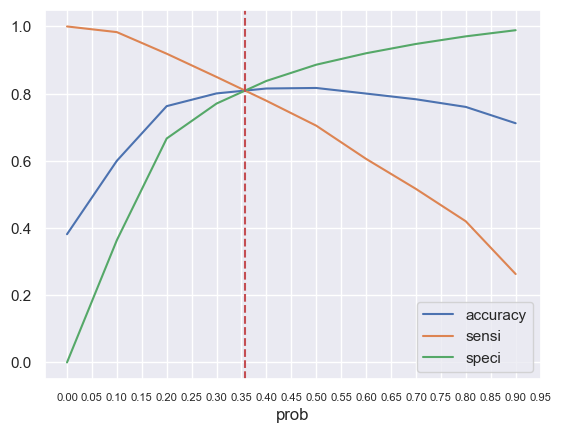

In [124]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.357, color='r', linestyle='--') # additing axline

plt.show()

#### From the above visualization, it seems that **0.357** is optimal cutoff point to take.


In [125]:
# Calculating final_predicted based on Converted_Prob using 0.357 cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.357 else 0)

In [126]:
# Now, dropping the unnecessary columns from the DF

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head() 


,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.053608,302,0
1,0,0.022650,6087,0
2,0,0.222715,1033,0
3,0,0.158289,7656,0
4,1,0.754615,3241,1


#### Assigning lead score to the leads based to prediction


In [128]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.053608,302,0,5
1,0,0.022650,6087,0,2
2,0,0.222715,1033,0,22
3,0,0.158289,7656,0,16
4,1,0.754615,3241,1,75


## Step 5: Model Evaluation


### Confusion Matrix


In [129]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion_matrix)

[[3191  744]
 [ 474 1954]]


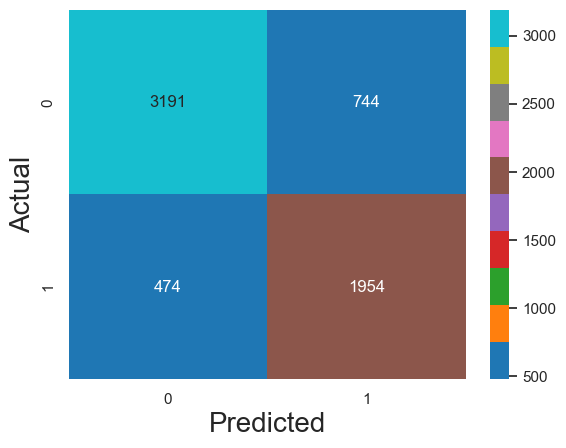

In [134]:
# Plotting confusion matrix
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap='tab10')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [143]:
# Calculating Overalll Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085808580858086

In [144]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [142]:
5147/6363

0.8088951752318089

In [146]:
# Sensitivity of our logistic regression model
print('sensitivity: ', TP / float(TP+FN))

# Specificity of our logistic regression model
print('Specificity: ', TN / float(TN+FP))

# False Postive Rate - predicting conversion when student leads do not convert
print('False Postive Rate: ', FP/ float(TN+FP))

# Positive Predictive value of our logistic regression model
print('Positive Predictive value: ', TP / float(TP+FP))

# Negative predictive value of our logistic regression model
print('Negative predictive value: ', TN / float(TN+ FN))


sensitivity:  0.8047775947281713
Specificity:  0.8109275730622617
False Postive Rate:  0.18907242693773824
Positive Predictive value:  0.7242401779095626
Negative predictive value:  0.870668485675307


### Precision and Recall


**Precision** - `TP / TP + FP`

**Recall** - `TP / TP + FN`

In [158]:
print('Precision:', confusion_matrix[1,1] / (confusion_matrix[0,1] + confusion_matrix[1,1]))
print('Recall:   ', confusion_matrix[1,1] / (confusion_matrix[1,0] + confusion_matrix[1,1]))

Precision: 0.7242401779095626
Recall:    0.8047775947281713


Now, Using sklearn utilities for the same

In [151]:
from sklearn.metrics import precision_score, recall_score

In [157]:
print('Precision(using sklearn utilities):', precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print('Recall(using sklearn utilities):   ',recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision(using sklearn utilities): 0.7242401779095626
Recall(using sklearn utilities):    0.8047775947281713


**Observation**

We have the following values for the Train Data:

- **Accuracy    :** 80.9%
- **Sensitivity :** 80.5%
- **Specificity :** 81.1%
- **Precision   :** 72.4%
- **Recall      :** 80.5%

### Plotting the ROC Curve

An **ROC curve** illustrates several points:

- It displays the balance between `sensitivity` and `specificity`, indicating that an increase in `sensitivity` results in a decrease in `specificity`.
- The more the curve hugs the left and top borders of the `ROC space`, the more accurate the test.
- The closer the curve is to the **45-degree diagonal** in the ROC space, the less accurate the test.

In [160]:
def draw_roc(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_true, y_score)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None



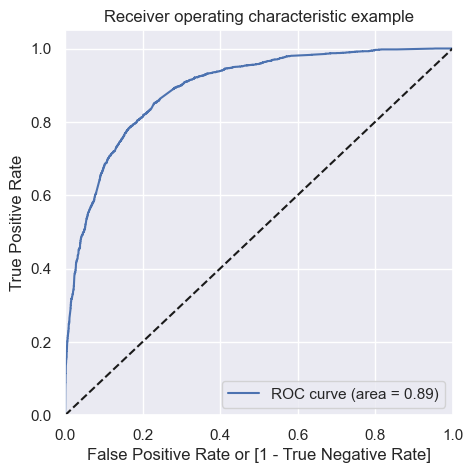

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Observation**

We have a strong value of **0.89**, suggesting that our predictive model is effective since an ROC curve value close to **1** indicates a high level of accuracy.

### Precision and recall tradeoff


In [162]:
from sklearn.metrics import precision_recall_curve

In [170]:
def plot_precision_recall_curve_(p, r, thresholds, axvline_x):
    plt.figure(figsize=(20,6))
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    plt.title('Precision Recall Curve',fontsize=20)
    plt.axvline(x=axvline_x, color='b', linestyle='--') # additing axline
    plt.xticks(np.arange(0,1,step=0.02),size=10)
    plt.yticks(size=20)

    plt.show()
    return None


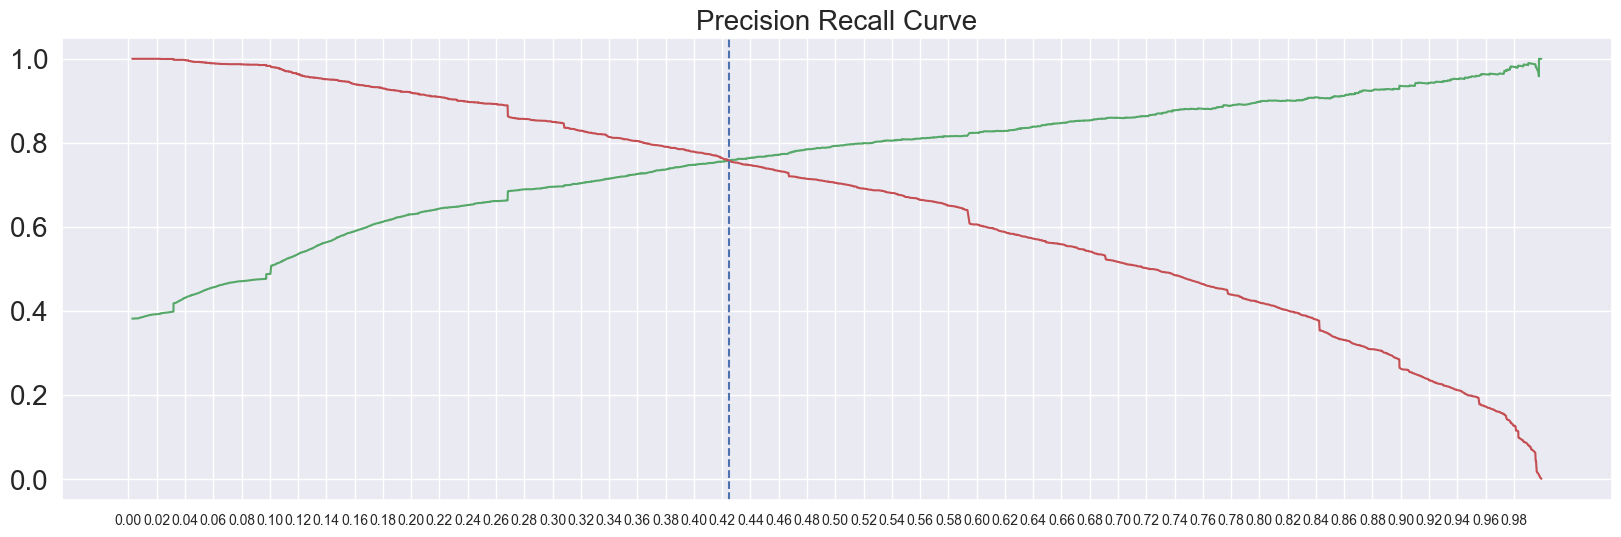

In [172]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plot_precision_recall_curve_(p, r, thresholds, 0.425)

**Observation**

From the `precision_recall_curve` above, we can see that the cutoff point is **0.427**.

Now using the above threshold value from `Precision Recall Tradeoff Curve` for Data Evaluation.


In [173]:
# Note: Again plotting the Train dataset again with 0.427 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score,final_predicted_2
0,0,0.053608,302,0,5,0
1,0,0.022650,6087,0,2,0
2,0,0.222715,1033,0,22,0
3,0,0.158289,7656,0,16,0
4,1,0.754615,3241,1,75,1


In [174]:
confusion_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_matrix_2)

[[3355  580]
 [ 597 1831]]


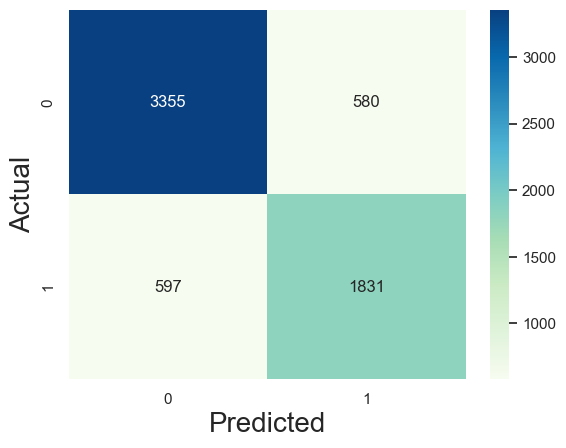

In [175]:
# Plotting 2nd confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='g', cmap='GnBu')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

In [176]:
# Calculating Overalll Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085808580858086

In [177]:
TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

# Sensitivity of our logistic regression model
print('sensitivity: ', TP / float(TP+FN))

# Specificity of our logistic regression model
print('Specificity: ', TN / float(TN+FP))

# False Postive Rate - predicting conversion when student leads do not convert
print('False Postive Rate: ', FP/ float(TN+FP))

# Positive Predictive value of our logistic regression model
print('Positive Predictive value: ', TP / float(TP+FP))

# Negative predictive value of our logistic regression model
print('Negative predictive value: ', TN / float(TN+ FN))

sensitivity:  0.7541186161449753
Specificity:  0.8526048284625158
False Postive Rate:  0.1473951715374841
Positive Predictive value:  0.7594359187059312
Negative predictive value:  0.8489372469635628


In [178]:
print('Precision:', confusion_matrix_2[1,1] / (confusion_matrix_2[0,1] + confusion_matrix_2[1,1]))
print('Recall:   ', confusion_matrix_2[1,1] / (confusion_matrix_2[1,0] + confusion_matrix_2[1,1]))

Precision: 0.7594359187059312
Recall:    0.7541186161449753


**Observation**

Using the `Precision-Recall trade-off curve` cutoff point, the number of `True Positives` decreased while the number of `True Negatives` increased.

Therefore, we cannot rely on the `Precision-Recall trade-off` method because it reduces the `True Positives`, thus decreasing the `Recall`/`Sensitivity`. To increase the number of True Positives, we need to increase the `Sensitivity Recall` value. Hence, we will use **0.358** as the optimal cutoff point.

## Step 6: Making predictions on the test set

In [180]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [182]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 6906 to 6219
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Landing Page Submission                   2727 non-null   int64  
 2   Lead Origin_Lead Add Form                             2727 non-null   int64  
 3   Lead Source_Olark Chat                                2727 non-null   int64  
 4   Lead Source_Welingak Website                          2727 non-null   int64  
 5   Last Activity_Olark Chat Conversation                 2727 non-null   int64  
 6   Last Activity_SMS Sent                                2727 non-null   int64  
 7   Last Activity_Unsubscribed                            2727 non-null   int64  
 8   What is your current occupation_Other                 2727 n

#### Making Predictions on the X_test dataset using the final model


In [185]:
y_test_pred = log_model3.predict(X_test)

In [186]:
y_test_pred[:10]

6906    0.901953
1873    0.214864
771     0.111243
4495    0.131265
9061    0.538928
4929    0.506070
2308    0.066402
1034    0.104615
9033    0.110605
7008    0.913941
dtype: float64

In [189]:
y_pred_df1 = pd.DataFrame(y_test_pred)
y_pred_df1.head()


,0
6906,0.901953
1873,0.214864
771,0.111243
4495,0.131265
9061,0.538928


In [190]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index # putting prospect id as index

In [191]:
# Removing index for both dataframes so that we can append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
# Appending both dataframes side by side
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.901953
1,0,1873,0.214864
2,0,771,0.111243
3,0,4495,0.131265
4,1,9061,0.538928


In [193]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'}) # Renaming the column '0' as 'Converted_Probability':-
# rearranging columns to a proper order
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Probability']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability
0,6906,1,0.901953
1,1873,0,0.214864
2,771,0,0.111243
3,4495,0,0.131265
4,9061,1,0.538928


Assigning Lead Score to the above dataframe

In [195]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score
0,6906,1,0.901953,90
1,1873,0,0.214864,21
2,771,0,0.111243,11
3,4495,0,0.131265,13
4,9061,1,0.538928,54


### Now, `Sentivity` - `Specificity` - `Accuracy plot cut-off` point, using cutoff point of **0.357** 


In [197]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.357 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score,Final_Predicted
0,6906,1,0.901953,90,1
1,1873,0,0.214864,21,0
2,771,0,0.111243,11,0
3,4495,0,0.131265,13,0
4,9061,1,0.538928,54,1


In [198]:
# Calculating Overalll Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8045471213788046

In [203]:
# Confusion matrix
confusion_matrix_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
print(confusion_matrix_3)

[[1337  323]
 [ 210  857]]


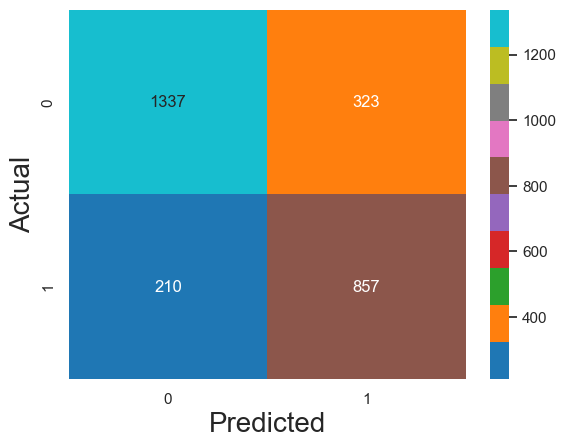

In [204]:
# Plotting confusion matrix
sns.heatmap(confusion_matrix_3, annot=True, fmt='g', cmap='tab10')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [205]:
TP = confusion_matrix_3[1,1] # true positive 
TN = confusion_matrix_3[0,0] # true negatives
FP = confusion_matrix_3[0,1] # false positives
FN = confusion_matrix_3[1,0] # false negatives

# Sensitivity of our logistic regression model
print('sensitivity: ', TP / float(TP+FN))

# Specificity of our logistic regression model
print('Specificity: ', TN / float(TN+FP))

# False Postive Rate - predicting conversion when student leads do not convert
print('False Postive Rate: ', FP/ float(TN+FP))

# Positive Predictive value of our logistic regression model
print('Positive Predictive value: ', TP / float(TP+FP))

# Negative predictive value of our logistic regression model
print('Negative predictive value: ', TN / float(TN+ FN))

sensitivity:  0.8031865042174321
Specificity:  0.805421686746988
False Postive Rate:  0.19457831325301206
Positive Predictive value:  0.726271186440678
Negative predictive value:  0.8642533936651584


In [206]:
print('Precision(using sklearn utilities):', precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print('Recall(using sklearn utilities):   ',recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Precision(using sklearn utilities): 0.726271186440678
Recall(using sklearn utilities):    0.8031865042174321


**Observation**

The sensitivity value for both the test and train data is **80%**, and the accuracy is **approximately 80%**. This indicates that the model performs well on the test data set as well.

### Identifying the top features based on the final model.

In [208]:
log_model3.params[1:]

Lead Origin_Landing Page Submission                    -0.869629
Lead Origin_Lead Add Form                               2.978775
Lead Source_Olark Chat                                  1.170840
Lead Source_Welingak Website                            3.153724
Last Activity_Olark Chat Conversation                  -1.222240
Last Activity_SMS Sent                                  1.382380
Last Activity_Unsubscribed                              1.445675
What is your current occupation_Other                  -1.188253
What is your current occupation_Working Professional    2.392955
Specialization_Hospitality Management                  -0.963194
Specialization_Other                                   -0.871031
Do Not Email                                           -1.572757
Total Time Spent on Website                             1.072358
dtype: float64

In [210]:
# Obtaining a relative coefficient value for each feature compared to the feature with the highest coefficient.

top_feature = log_model3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission                     -27.574667
Lead Origin_Lead Add Form                                94.452639
Lead Source_Olark Chat                                   37.125640
Lead Source_Welingak Website                            100.000000
Last Activity_Olark Chat Conversation                   -38.755443
Last Activity_SMS Sent                                   43.833273
Last Activity_Unsubscribed                               45.840268
What is your current occupation_Other                   -37.677771
What is your current occupation_Working Professional     75.877131
Specialization_Hospitality Management                   -30.541483
Specialization_Other                                    -27.619119
Do Not Email                                            -49.869833
Total Time Spent on Website                              34.002924
dtype: float64

#### Visualizing the feature variables according to their relative importance

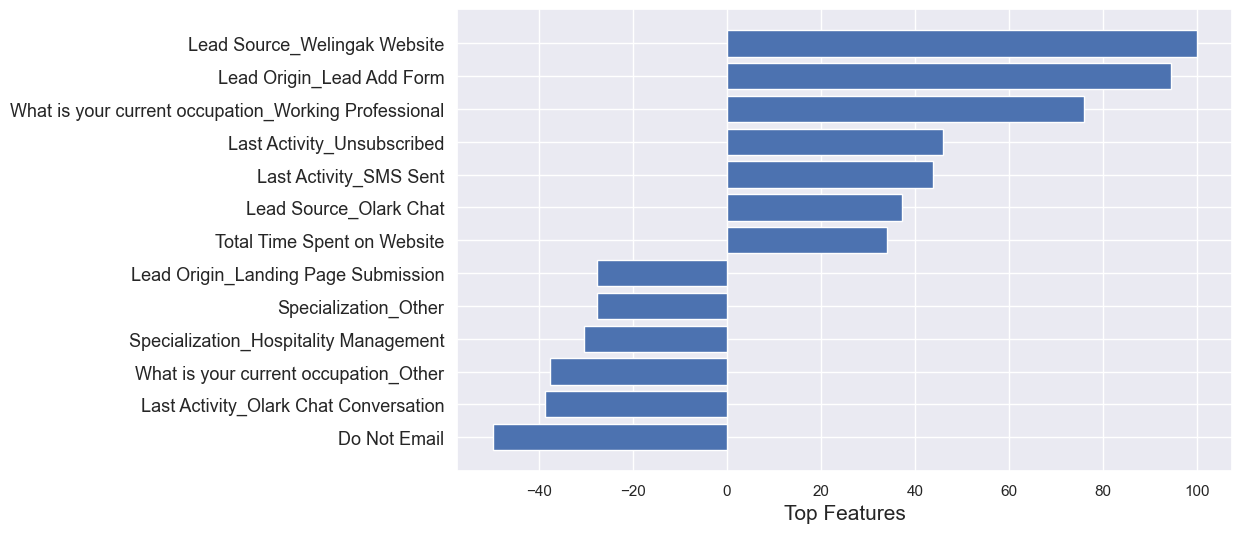

In [213]:
top_feature_sort = np.argsort(top_feature,kind='quicksort', order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation: 

`Converted` = **0.261843** + **3.15** X `Lead Source_Welingak Website` + **2.98** X `Lead Origin_Lead Add Form` + **2.39** X `What is your current occupation_Working Professional` + **1.45** X `Last Activity_Unsubscribed` + **1.38** X `Last Activity_SMS Sent` + **1.17** X `Lead Source_Olark Chat` + **1.07** X `Total Time Spent on Website` - **0.87** X `Lead Origin_Landing Page Submission` - **0.87** X `Specialization_Other` - **0.96** X `Specialization_Hospitality Management` - **1.19** X `What is your current occupation_Other` - **1.22** X `Last Activity_Olark Chat Conversation`

#### Final Observation

Evaluation Metrics for the **train Dataset**:
- Accuracy :0.80
- Sensitivity:~0.80
- Specificity:0.81
- Precision: 0.72
- Recall: 0.80


Evaluation Metrics for the **test Dataset**:-
- Accuracy : 0.80
- Sensitivity: ~ 0.80
- Specificity: 0.80
- Precision: 0.72
- Recall: 0.80

### Recommendation:

To boost the potential lead conversion rate, X-Education should focus on the key features responsible for a higher conversion rate:

- **Lead Source_Welingak Website**: Leads from the `Welingak Website` show a higher conversion rate, so the company should prioritize this website to attract more potential leads.

- **Lead Origin_Lead Add Form**: Leads who engage through the `Lead Add Form` have a **higher conversion rate**, so focusing on this method can bring in more high-potential leads.

- **Current Occupation_Working Professional**: Leads who are working professionals have a **higher conversion rate**. The company should target working professionals to increase the number of leads with a higher likelihood of conversion.

- **Last Activity_SMS Sent**: Leads whose last activity involved an SMS being sent are potential high-value leads for the company.

- **Total Time Spent on Website**: Leads who spend more time on the website are more likely to convert, making them potential high-value leads.